In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing the required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [7]:

# Setting  the path to the folder
folder_path = '/kaggle/input/sensor-based-american-sign-language-recognition'  # change this to your actual folder name

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and concatenate all CSVs with numeric user labels
combined_data = []
for idx, file in enumerate(csv_files, start=1):
    df = pd.read_csv(os.path.join(folder_path, file))
    df['user'] = idx  # numeric user label
    combined_data.append(df)

combined_df = pd.concat(combined_data, ignore_index=True)

# Save to a single CSV
combined_df.to_csv('/kaggle/working/sign_combined.csv', index=False)



In [16]:
#checking if there is nan column or not 
combined_df['SIGN'].isna().sum()


1

In [17]:
# Get number of unique gestures
unique_signs = combined_df['SIGN'].nunique()
print(f"Number of unique signs: {unique_signs}\n")

# Print each unique gesture and its count
print("Unique gestures and their counts:")
print(combined_df['SIGN'].value_counts())



Number of unique signs: 7

Unique gestures and their counts:
SIGN
THANK YOU    399
THIS         399
PROUD        398
WE           397
STUDENT      397
PAUSE        300
WORK         299
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Step 1: Work with combined_df ---
df = combined_df.copy()  # work on a copy for safety

# --- Step 2: Define columns ---
label_col = 'SIGN'
user_col = 'user'  # this column identifies the person/user who did the gesture

# --- Step 3: Get sensor columns (exclude user column) ---
sensor_cols = df.select_dtypes(include=np.number).drop(columns=[user_col]).columns.tolist()

# --- Step 4: Encode gestures (words) into numbers ---
label_encoder = LabelEncoder()
df['sign_encoded'] = label_encoder.fit_transform(df[label_col])
num_classes = len(label_encoder.classes_)

# --- Step 5: Scale sensor data only ---
scaler = StandardScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

# --- Step 6: Done ---
print("--- Data Preprocessing Successful ---")
print(f"Found {len(sensor_cols)} sensor features and {num_classes} unique signs.")

# Optional: show gesture-to-label mapping
print("\nSIGN label encoding:")
for label, code in zip(label_encoder.classes_, range(num_classes)):
    print(f"{label} → {code}")



--- Data Preprocessing Successful ---
Found 439 sensor features and 8 unique signs.

SIGN label encoding:
PAUSE → 0
PROUD → 1
STUDENT → 2
THANK YOU → 3
THIS → 4
WE → 5
WORK → 6
nan → 7


In [31]:
df

,Flex-Left-1-Frame-1,Flex-Left-1-Frame-2,Flex-Left-1-Frame-3,Flex-Left-1-Frame-4,Flex-Left-1-Frame-5,Flex-Left-1-Frame-6,Flex-Left-1-Frame-7,Flex-Left-1-Frame-8,Flex-Left-1-Frame-9,Flex-Left-1-Frame-10,...,Orientation-Z-Right-Frame-18,Orientation-X-Right-Frame-19,Orientation-Y-Right-Frame-19,Orientation-Z-Right-Frame-19,Orientation-X-Right-Frame-20,Orientation-Y-Right-Frame-20,Orientation-Z-Right-Frame-20,SIGN,user,sign_encoded
0,1.450327,1.336223,1.451663,1.380035,1.138827,0.949775,0.834635,0.749668,0.665910,0.555656,...,-0.904956,-0.166649,1.683416,-0.990287,-0.187487,1.630395,0.17,PAUSE,1,0
1,1.523763,1.409796,1.525496,1.486383,1.227710,1.093903,0.916133,0.749668,0.649485,0.587159,...,-0.904956,-0.147658,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
2,1.450327,1.556941,1.525496,1.486383,1.198082,1.069882,0.895759,0.713926,0.649485,0.602910,...,-0.925740,-0.166649,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
3,1.009708,0.968360,0.971747,0.990092,0.872177,0.733584,0.590142,0.499473,0.419535,0.350884,...,-0.904956,-0.147658,1.683416,-0.967636,-0.207783,1.612337,0.16,PAUSE,1,0
4,1.119863,1.078719,1.008664,1.096440,0.842549,0.805648,0.610517,0.553086,0.452385,0.398139,...,-0.904956,-0.147658,1.701589,-0.967636,-0.207783,1.630395,0.15,PAUSE,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,-1.230103,-1.165245,-1.280165,-1.172321,-2.416504,-3.205898,-2.792012,-2.449256,-2.290588,-2.232383,...,0.861749,-0.204633,-0.824489,0.957649,-0.288968,-0.969971,0.96,WORK,5,6
2586,-1.707439,-1.717039,-1.796997,-1.739511,-3.009059,-3.085792,-2.690140,-2.449256,-2.241313,-2.169377,...,0.799395,-0.432532,-1.024395,0.821747,-0.268672,-0.626867,0.87,WORK,5,6
2587,-3.176168,-2.379193,-2.276913,-3.582878,-3.809008,-3.205898,-2.730888,-2.431385,-2.241313,-2.216632,...,0.820179,-0.185641,-0.915355,0.912348,-0.268672,-1.042203,0.96,WORK,5,6
2588,-0.385584,-0.944527,-0.578750,-0.356985,-0.312933,-0.299329,-0.591574,-2.270545,-2.290588,-2.216632,...,0.300560,-0.603456,-0.933528,0.685844,-0.268672,-0.771331,0.92,WORK,5,6


In [29]:
#copying it so that we can first check accuracy of Logistic regression on it 
df_log = df.copy().reset_index(drop=True)


In [30]:
df_log

,Flex-Left-1-Frame-1,Flex-Left-1-Frame-2,Flex-Left-1-Frame-3,Flex-Left-1-Frame-4,Flex-Left-1-Frame-5,Flex-Left-1-Frame-6,Flex-Left-1-Frame-7,Flex-Left-1-Frame-8,Flex-Left-1-Frame-9,Flex-Left-1-Frame-10,...,Orientation-Z-Right-Frame-18,Orientation-X-Right-Frame-19,Orientation-Y-Right-Frame-19,Orientation-Z-Right-Frame-19,Orientation-X-Right-Frame-20,Orientation-Y-Right-Frame-20,Orientation-Z-Right-Frame-20,SIGN,user,sign_encoded
0,1.450327,1.336223,1.451663,1.380035,1.138827,0.949775,0.834635,0.749668,0.665910,0.555656,...,-0.904956,-0.166649,1.683416,-0.990287,-0.187487,1.630395,0.17,PAUSE,1,0
1,1.523763,1.409796,1.525496,1.486383,1.227710,1.093903,0.916133,0.749668,0.649485,0.587159,...,-0.904956,-0.147658,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
2,1.450327,1.556941,1.525496,1.486383,1.198082,1.069882,0.895759,0.713926,0.649485,0.602910,...,-0.925740,-0.166649,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
3,1.009708,0.968360,0.971747,0.990092,0.872177,0.733584,0.590142,0.499473,0.419535,0.350884,...,-0.904956,-0.147658,1.683416,-0.967636,-0.207783,1.612337,0.16,PAUSE,1,0
4,1.119863,1.078719,1.008664,1.096440,0.842549,0.805648,0.610517,0.553086,0.452385,0.398139,...,-0.904956,-0.147658,1.701589,-0.967636,-0.207783,1.630395,0.15,PAUSE,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,-1.230103,-1.165245,-1.280165,-1.172321,-2.416504,-3.205898,-2.792012,-2.449256,-2.290588,-2.232383,...,0.861749,-0.204633,-0.824489,0.957649,-0.288968,-0.969971,0.96,WORK,5,6
2586,-1.707439,-1.717039,-1.796997,-1.739511,-3.009059,-3.085792,-2.690140,-2.449256,-2.241313,-2.169377,...,0.799395,-0.432532,-1.024395,0.821747,-0.268672,-0.626867,0.87,WORK,5,6
2587,-3.176168,-2.379193,-2.276913,-3.582878,-3.809008,-3.205898,-2.730888,-2.431385,-2.241313,-2.216632,...,0.820179,-0.185641,-0.915355,0.912348,-0.268672,-1.042203,0.96,WORK,5,6
2588,-0.385584,-0.944527,-0.578750,-0.356985,-0.312933,-0.299329,-0.591574,-2.270545,-2.290588,-2.216632,...,0.300560,-0.603456,-0.933528,0.685844,-0.268672,-0.771331,0.92,WORK,5,6


In [32]:
#standardising 
from sklearn.preprocessing import StandardScaler

# Identify all numeric columns
numeric_cols = df_log.select_dtypes(include='number').columns.tolist()

# Exclude 'user' and 'sign_encoded' from scaling
exclude_cols = ['user', 'sign_encoded']
scale_cols = [col for col in numeric_cols if col not in exclude_cols]

# Initialize scaler and apply scaling
scaler = StandardScaler()
df_log[scale_cols] = scaler.fit_transform(df_log[scale_cols])


In [34]:
#Dowloading it for checking purpose 
df_log.to_csv('scaled_output.csv', index=False)


In [45]:

# Drop rows where sign_encoded is 7
df_log = df_log[df_log['sign_encoded'] != 7]


In [46]:
#making the input and the labels 
# Input features (X): all scaled numeric columns, excluding 'user' and 'sign_encoded'
x = df_log.drop(columns=['user', 'sign_encoded' , 'SIGN'])

# Target label (y): the encoded sign column
y = df_log['sign_encoded']


In [47]:
x.shape

(2589, 440)

In [48]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)



In [49]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score

# Create and train Logistic Regression with 5-fold cross-validation
model = LogisticRegressionCV(
    cv=5,
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    scoring='accuracy'
)
model.fit(X_train, y_train)






LogisticRegressionCV(cv=5, max_iter=1000, multi_class='multinomial',
                     scoring='accuracy')

In [50]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9961389961389961

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      0.99        80
           2       1.00      1.00      1.00        79
           3       1.00      0.99      0.99        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        79
           6       1.00      0.98      0.99        60

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



<Figure size 800x600 with 0 Axes>

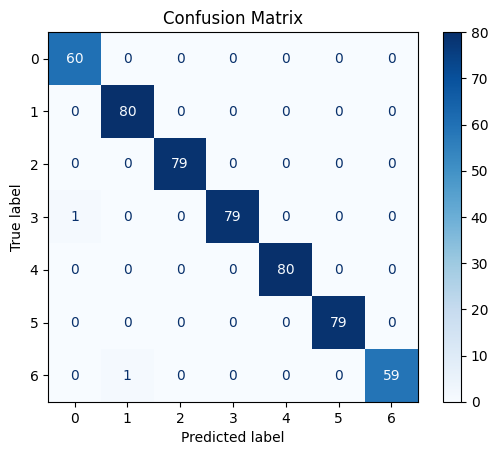

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


***Now we will use LSTM for same purpose and see its accuracy***

In [ ]:
#we will use the df dataframe we saved for this purpose 


In [54]:
#importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


2025-06-19 14:17:18.613205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750342638.872880      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750342638.952978      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [56]:
df

,Flex-Left-1-Frame-1,Flex-Left-1-Frame-2,Flex-Left-1-Frame-3,Flex-Left-1-Frame-4,Flex-Left-1-Frame-5,Flex-Left-1-Frame-6,Flex-Left-1-Frame-7,Flex-Left-1-Frame-8,Flex-Left-1-Frame-9,Flex-Left-1-Frame-10,...,Orientation-Z-Right-Frame-18,Orientation-X-Right-Frame-19,Orientation-Y-Right-Frame-19,Orientation-Z-Right-Frame-19,Orientation-X-Right-Frame-20,Orientation-Y-Right-Frame-20,Orientation-Z-Right-Frame-20,SIGN,user,sign_encoded
0,1.450327,1.336223,1.451663,1.380035,1.138827,0.949775,0.834635,0.749668,0.665910,0.555656,...,-0.904956,-0.166649,1.683416,-0.990287,-0.187487,1.630395,0.17,PAUSE,1,0
1,1.523763,1.409796,1.525496,1.486383,1.227710,1.093903,0.916133,0.749668,0.649485,0.587159,...,-0.904956,-0.147658,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
2,1.450327,1.556941,1.525496,1.486383,1.198082,1.069882,0.895759,0.713926,0.649485,0.602910,...,-0.925740,-0.166649,1.701589,-0.990287,-0.207783,1.630395,0.15,PAUSE,1,0
3,1.009708,0.968360,0.971747,0.990092,0.872177,0.733584,0.590142,0.499473,0.419535,0.350884,...,-0.904956,-0.147658,1.683416,-0.967636,-0.207783,1.612337,0.16,PAUSE,1,0
4,1.119863,1.078719,1.008664,1.096440,0.842549,0.805648,0.610517,0.553086,0.452385,0.398139,...,-0.904956,-0.147658,1.701589,-0.967636,-0.207783,1.630395,0.15,PAUSE,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,-1.230103,-1.165245,-1.280165,-1.172321,-2.416504,-3.205898,-2.792012,-2.449256,-2.290588,-2.232383,...,0.861749,-0.204633,-0.824489,0.957649,-0.288968,-0.969971,0.96,WORK,5,6
2586,-1.707439,-1.717039,-1.796997,-1.739511,-3.009059,-3.085792,-2.690140,-2.449256,-2.241313,-2.169377,...,0.799395,-0.432532,-1.024395,0.821747,-0.268672,-0.626867,0.87,WORK,5,6
2587,-3.176168,-2.379193,-2.276913,-3.582878,-3.809008,-3.205898,-2.730888,-2.431385,-2.241313,-2.216632,...,0.820179,-0.185641,-0.915355,0.912348,-0.268672,-1.042203,0.96,WORK,5,6
2588,-0.385584,-0.944527,-0.578750,-0.356985,-0.312933,-0.299329,-0.591574,-2.270545,-2.290588,-2.216632,...,0.300560,-0.603456,-0.933528,0.685844,-0.268672,-0.771331,0.92,WORK,5,6


In [55]:
# CELL 3: Create Sequences from Time-Series Data
def create_sequences(data, time_steps=50, step=25):
    sequences, labels, groups = [], [], []
    for _, group in data.groupby(['user', 'sign_encoded']):
        for i in range(0, len(group) - time_steps, step):
            sequences.append(group[sensor_cols].iloc[i:i + time_steps].values)
            labels.append(group['sign_encoded'].iloc[i])
            groups.append(group['user'].iloc[i])
    return np.array(sequences), np.array(labels), np.array(groups)

TIME_STEPS = 50
STEP = 25
X, y_int, groups = create_sequences(df, TIME_STEPS, STEP)
y = to_categorical(y_int, num_classes=num_classes)

In [58]:
n_groups = len(np.unique(groups))
N_SPLITS = n_groups
gkf = GroupKFold(n_splits=N_SPLITS)

print(f"--- Starting {N_SPLITS}-Fold Cross-Validation ---")

all_acc_scores = []
for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups=groups)):
    print(f"\n--- FOLD {fold + 1}/{N_SPLITS} ---")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Build the Model
    inputs = Input(shape=(TIME_STEPS, X_train.shape[2]))
    x = LSTM(64, return_sequences=True)(inputs)
    x = Dropout(0.5)(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the Model
    print(f"Training on {len(np.unique(groups[train_idx]))} user groups, testing on {len(np.unique(groups[test_idx]))} user group(s)...")
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate and store results
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold + 1} Test Accuracy: {accuracy*100:.2f}%")
    all_acc_scores.append(accuracy)

print("\n\n--- Cross-Validation Summary ---")
print(f"Mean Accuracy: {np.mean(all_acc_scores)*100:.2f}%")
print(f"Standard Deviation of Accuracy: {np.std(all_acc_scores)*100:.2f}%")

--- Starting 5-Fold Cross-Validation ---

--- FOLD 1/5 ---
Training on 4 user groups, testing on 1 user group(s)...
Fold 1 Test Accuracy: 91.67%

--- FOLD 2/5 ---
Training on 4 user groups, testing on 1 user group(s)...
Fold 2 Test Accuracy: 100.00%

--- FOLD 3/5 ---
Training on 4 user groups, testing on 1 user group(s)...
Fold 3 Test Accuracy: 100.00%

--- FOLD 4/5 ---
Training on 4 user groups, testing on 1 user group(s)...
Fold 4 Test Accuracy: 40.00%

--- FOLD 5/5 ---
Training on 4 user groups, testing on 1 user group(s)...
Fold 5 Test Accuracy: 10.00%


--- Cross-Validation Summary ---
Mean Accuracy: 68.33%
Standard Deviation of Accuracy: 36.76%


In [59]:
# CELL 5: Train Final Model for Analysis
inputs = Input(shape=(TIME_STEPS, X.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = Dropout(0.5)(x)
x = LSTM(64)(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
final_model = Model(inputs=inputs, outputs=outputs)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = final_model.fit(X, y, epochs=50, batch_size=128,
                          validation_split=0.2,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
                          verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.1591 - loss: 2.0705 - val_accuracy: 0.3333 - val_loss: 2.0053
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.2727 - loss: 1.9570 - val_accuracy: 0.3333 - val_loss: 1.9364
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6136 - loss: 1.8019 - val_accuracy: 0.5000 - val_loss: 1.8751
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6364 - loss: 1.7394 - val_accuracy: 0.5000 - val_loss: 1.8116
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5455 - loss: 1.6747 - val_accuracy: 0.5000 - val_loss: 1.7476
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7727 - loss: 1.5567 - val_accuracy: 0.8333 - val_loss: 1.6871
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7273 - loss: 1.4891 - val_accuracy: 0.8333 - val_loss: 1.6289
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9318 - loss: 1.3716 - val_accuracy: 0.8333 - val_loss: 1.

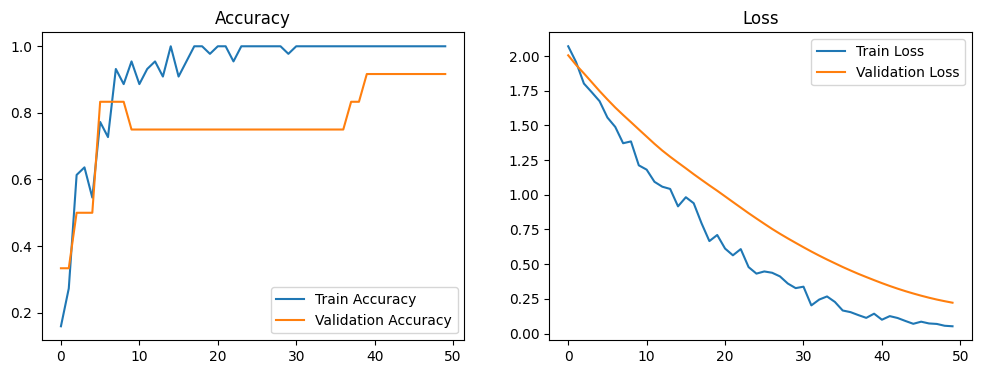

In [60]:
# CELL 6: Training History Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Classification Report:
              precision    recall  f1-score   support

       PAUSE       1.00      1.00      1.00        10
       PROUD       1.00      1.00      1.00         8
     STUDENT       1.00      0.88      0.93         8
   THANK YOU       0.89      1.00      0.94         8
        THIS       1.00      1.00      1.00         8
          WE       1.00      1.00      1.00         8
        WORK       1.00      1.00      1.00         6

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



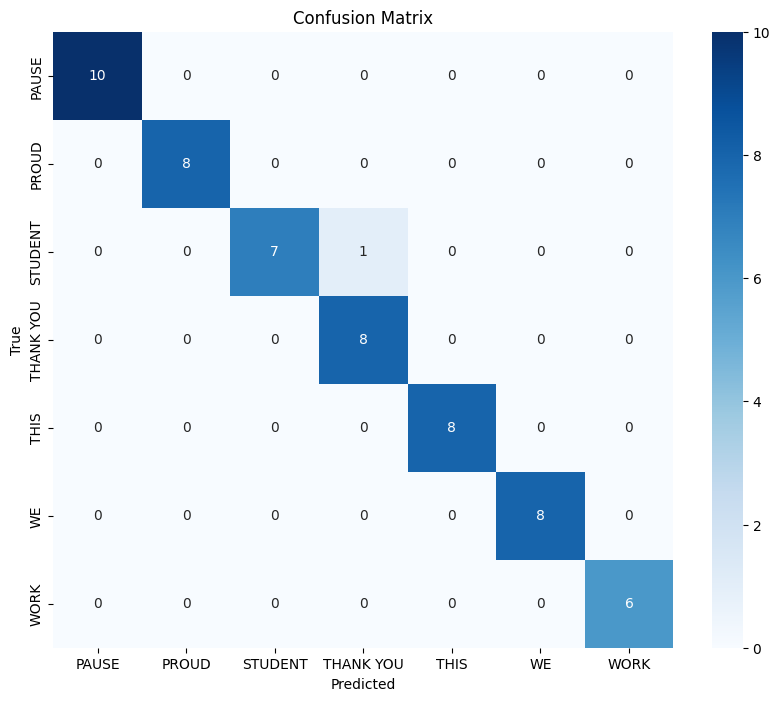

In [64]:
# CELL 7: Final Evaluation and Confusion Matrix
from sklearn.utils.multiclass import unique_labels

y_pred_probs = final_model.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y, axis=1)

valid_labels = unique_labels(y_true, y_pred)
valid_class_names = label_encoder.inverse_transform(valid_labels)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=valid_labels, target_names=valid_class_names))

cm = confusion_matrix(y_true, y_pred, labels=valid_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=valid_class_names,
            yticklabels=valid_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
print(f"\nFinal Model Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")



Final Model Accuracy: 98.21%


Although we got more accuracy in the LogisticRegression model but still we will favor LSTM because it can catch temporal features which LogisticRegression can not also on large dataset LogisticRegression will fail in giving high accuracy